In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [85]:
x = pd.read_csv("xdata.csv", index_col = False,usecols = [1,2])
y = pd.read_csv("ydata.csv", index_col = False , usecols= [1])

x_data,y_data = x.values,y.values.reshape(-1)
print(x_data.shape,y_data.shape)

(399, 2) (399,)


In [86]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2)

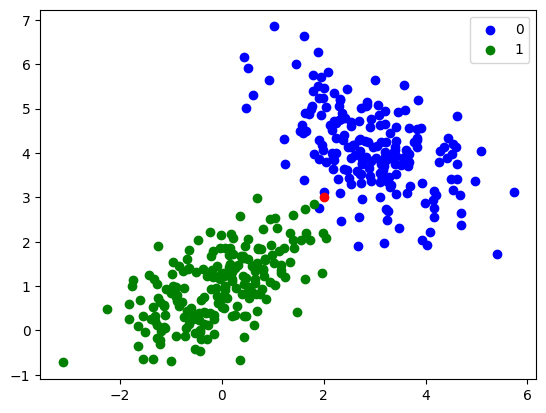

In [87]:
plt.scatter(x_data[y_data == 0][:,0],x_data[y_data == 0][:,1],c='blue',label = '0')
plt.scatter(x_data[y_data == 1][:,0],x_data[y_data == 1][:,1],c='green',label='1')
plt.scatter(2,3,c = 'red')
plt.legend()
plt.show()

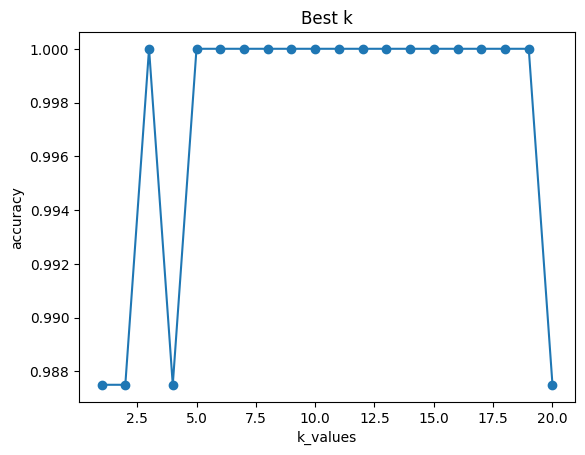

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = range(1,21)
accuracy = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy.append(accuracy_score(y_test,y_pred))
    

plt.plot(k_values,accuracy,marker='o')
plt.xlabel("k_values")
plt.ylabel("accuracy")
plt.title("Best k")
plt.show()

In [79]:
T = np.array([2,3])
T

array([2, 3])

In [71]:
class KNNClassifier:
    def __init__(self , k=5):
        self.k = k

    def fit(self,x,y):
        self.x = x
        self.y = y
        
    def distance(self,p1,p2):
        return np.sqrt(np.sum((p1-p2)**2))

    def predict_1(self,t):
        dist = []
        for p in self.x:
            dist.append (distance(t,p))

        knear = np.argsort(dist)[:self.k]
        klabels = []
        for p in knear:
            klabels.append(self.y[p])

        labels,counts = np.unique(klabels, return_counts = True )
        predlabel = labels[np.argmax(counts)]
        prob = np.max(counts)/self.k

        return predlabel

    def predict(self,t):
        predictions= []
        for i in range(len(t)):
            predictions.append(self.predict_1(t[i]))
        return np.array(predictions)

    def accuracy(ytrue,ypred):
        return np.mean(ytrue == ypred)

In [82]:
clf = KNNClassifier(k=5)
clf.fit(x_train,y_train)
ypred = clf.predict(x_test)
KNNClassifier.accuracy(y_test,ypred)


np.float64(1.0)